In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
hate_speech = pd.read_csv('hatexplain_final.csv')

In [ ]:
hate_speech.head()

,post_id,post_tokens,label_1,label_2,label_3,normal,offensive,hatespeech,vote
0,1179055004553900032_twitter,"['i', 'dont', 'think', 'im', 'getting', 'my', ...",normal,normal,normal,1,0,0,normal
1,1179063826874032128_twitter,"['we', 'cannot', 'continue', 'calling', 'ourse...",normal,normal,normal,1,0,0,normal
2,1178793830532956161_twitter,"['nawt', 'yall', 'niggers', 'ignoring', 'me']",normal,normal,hatespeech,1,0,1,normal
3,1179088797964763136_twitter,"['<user>', 'i', 'am', 'bit', 'confused', 'coz'...",hatespeech,offensive,hatespeech,0,1,1,hatespeech
4,1179085312976445440_twitter,"['this', 'bitch', 'in', 'whataburger', 'eating...",hatespeech,hatespeech,offensive,0,1,1,hatespeech


In [ ]:
hate_speech.isnull().sum()   #checking for null values

post_id        0
post_tokens    0
label_1        0
label_2        0
label_3        0
normal         0
offensive      0
hatespeech     0
vote           0
dtype: int64

In [ ]:
hate_speech.duplicated().sum()  #checking for duplicates

0

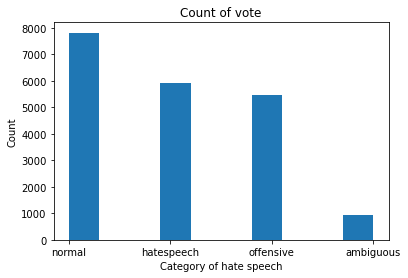

In [ ]:
plt.hist(hate_speech['vote'])
plt.xlabel('Category of hate speech')
plt.ylabel('Count')
plt.title('Count of vote')
plt.show()

In [ ]:
hate_speech.head()

,post_id,post_tokens,label_1,label_2,label_3,normal,offensive,hatespeech,vote
0,1179055004553900032_twitter,"['i', 'dont', 'think', 'im', 'getting', 'my', ...",normal,normal,normal,1,0,0,normal
1,1179063826874032128_twitter,"['we', 'cannot', 'continue', 'calling', 'ourse...",normal,normal,normal,1,0,0,normal
2,1178793830532956161_twitter,"['nawt', 'yall', 'niggers', 'ignoring', 'me']",normal,normal,hatespeech,1,0,1,normal
3,1179088797964763136_twitter,"['<user>', 'i', 'am', 'bit', 'confused', 'coz'...",hatespeech,offensive,hatespeech,0,1,1,hatespeech
4,1179085312976445440_twitter,"['this', 'bitch', 'in', 'whataburger', 'eating...",hatespeech,hatespeech,offensive,0,1,1,hatespeech


In [ ]:
hate_speech['token_sentence'] = hate_speech['post_tokens'].apply(eval).apply(' '.join) #converting post_tokens to sentence

In [ ]:
hate_speech['token_sentence']

0        i dont think im getting my baby them white 9 h...
1        we cannot continue calling ourselves feminists...
2                            nawt yall niggers ignoring me
3        <user> i am bit confused coz chinese ppl can n...
4        this bitch in whataburger eating a burger with...
                               ...                        
20143    if ur still on twitter tell carlton i said his...
20144    when i first got on here and said i hate trump...
20145    was macht der moslem wenn der zion gegen seine...
20146    it is awful look at world demographics asians ...
20147    the jewish globalist elite have only imported ...
Name: token_sentence, Length: 20148, dtype: object

In [ ]:
from nltk import word_tokenize
import nltk
#nltk.download('punkt')

In [ ]:
hate_speech['new_token_sentence'] = hate_speech['token_sentence'].apply(word_tokenize)

In [ ]:
from nltk.probability import FreqDist
frequency = hate_speech['new_token_sentence'].apply(FreqDist) #to check the frequency of each word

In [ ]:
frequency

0        {'i': 1, 'dont': 1, 'think': 1, 'im': 1, 'gett...
1        {'we': 1, 'can': 1, 'not': 1, 'continue': 1, '...
2        {'nawt': 1, 'yall': 1, 'niggers': 1, 'ignoring...
3        {'<': 1, 'user': 1, '>': 1, 'i': 2, 'am': 1, '...
4        {'this': 1, 'bitch': 1, 'in': 1, 'whataburger'...
                               ...                        
20143    {'if': 1, 'ur': 1, 'still': 1, 'on': 1, 'twitt...
20144    {'when': 1, 'i': 3, 'first': 1, 'got': 1, 'on'...
20145    {'was': 2, 'macht': 1, 'der': 2, 'moslem': 1, ...
20146    {'it': 1, 'is': 2, 'awful': 1, 'look': 1, 'at'...
20147    {'the': 1, 'jewish': 1, 'globalist': 1, 'elite...
Name: new_token_sentence, Length: 20148, dtype: object